<a href="https://colab.research.google.com/github/srahmawati/srahmawati/blob/main/Copy_of_Anreg_PaperM_Baru.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd                           
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
%matplotlib inline
import datetime as dt

# ! pip install plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

#Import Dataset

In [2]:
# Import dataset
bist100 = pd.read_csv("https://raw.githubusercontent.com/DyiyahKresnaEniArofah/Dyiyah-Kresna-Eni-Arofah/main/KAEF.JK.csv")
bist100.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-19,4930.0,5200.0,4910.0,4910.0,4907.655273,41433500
1,2021-01-20,4590.0,4970.0,4570.0,4810.0,4807.703125,144000200
2,2021-01-21,4810.0,5150.0,4720.0,4800.0,4797.707520,56613300
3,2021-01-22,4800.0,4850.0,4470.0,4470.0,4467.865234,26486200
4,2021-01-25,4210.0,4250.0,4160.0,4160.0,4158.013184,3051200


In [3]:
# Rename columns
bist100.rename(columns={"Date":"date","Open":"open","High":"high","Low":"low","Close":"close"}, inplace= True)
bist100.head()

,date,open,high,low,close,Adj Close,Volume
0,2021-01-19,4930.0,5200.0,4910.0,4910.0,4907.655273,41433500
1,2021-01-20,4590.0,4970.0,4570.0,4810.0,4807.703125,144000200
2,2021-01-21,4810.0,5150.0,4720.0,4800.0,4797.707520,56613300
3,2021-01-22,4800.0,4850.0,4470.0,4470.0,4467.865234,26486200
4,2021-01-25,4210.0,4250.0,4160.0,4160.0,4158.013184,3051200


#Preprocessing Data

##Checking null and na value

In [4]:
# Checking null value
bist100.isnull().sum()

date         0
open         0
high         0
low          0
close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
# Checking na value
bist100.isna().any()

date         False
open         False
high         False
low          False
close        False
Adj Close    False
Volume       False
dtype: bool

In [6]:
# Checking Data type of each column
bist100.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       249 non-null    object 
 1   open       249 non-null    float64
 2   high       249 non-null    float64
 3   low        249 non-null    float64
 4   close      249 non-null    float64
 5   Adj Close  249 non-null    float64
 6   Volume     249 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.7+ KB


##Konversi tanggal dari string ke format tanggal

In [7]:
#konversi bidang tanggal dari string ke format Tanggal dan buat itu menjadi indeks
bist100['date'] = pd.to_datetime(bist100.date)
bist100.head()

,date,open,high,low,close,Adj Close,Volume
0,2021-01-19,4930.0,5200.0,4910.0,4910.0,4907.655273,41433500
1,2021-01-20,4590.0,4970.0,4570.0,4810.0,4807.703125,144000200
2,2021-01-21,4810.0,5150.0,4720.0,4800.0,4797.707520,56613300
3,2021-01-22,4800.0,4850.0,4470.0,4470.0,4467.865234,26486200
4,2021-01-25,4210.0,4250.0,4160.0,4160.0,4158.013184,3051200


##Menyortir kumpulan data berdasarkan format tanggal

In [8]:
bist100.sort_values(by='date', inplace=True)
bist100.head()

,date,open,high,low,close,Adj Close,Volume
0,2021-01-19,4930.0,5200.0,4910.0,4910.0,4907.655273,41433500
1,2021-01-20,4590.0,4970.0,4570.0,4810.0,4807.703125,144000200
2,2021-01-21,4810.0,5150.0,4720.0,4800.0,4797.707520,56613300
3,2021-01-22,4800.0,4850.0,4470.0,4470.0,4467.865234,26486200
4,2021-01-25,4210.0,4250.0,4160.0,4160.0,4158.013184,3051200


In [9]:
bist100.shape

(249, 7)

#EDA - Exploratory Data Analysis

##Memunculkan durasi kumpulan data

In [10]:
print("Starting date: ",bist100.iloc[0][0])
print("Ending date: ", bist100.iloc[-1][0])
print("Duration: ", bist100.iloc[-1][0]-bist100.iloc[0][0])

Starting date:  2021-01-19 00:00:00
Ending date:  2022-01-19 00:00:00
Duration:  365 days 00:00:00


##Perbandingan bulanan antara harga aktual, pembukaan dan penutupan Saham

In [12]:
monthvise= bist100.groupby(bist100['date'].dt.strftime('%B'))[['open','close']].mean().sort_values(by='close')
monthvise.head()

,open,close
date,,
September,2366.818182,2362.727273
August,2474.000000,2450.000000
November,2452.272727,2458.636364
December,2519.545455,2499.545455
October,2507.000000,2500.500000


In [13]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Stock actual, open and close price')
fig.show()

##Harga saham Tinggi dan Rendah setiap bulan

In [14]:
bist100.groupby(bist100['date'].dt.strftime('%B'))['low'].min()

date
April        2450.0
August       2270.0
December     2410.0
February     2910.0
January      2070.0
July         2660.0
June         2190.0
March        2530.0
May          2370.0
November     2380.0
October      2360.0
September    2300.0
Name: low, dtype: float64

In [15]:
monthvise_high= bist100.groupby(bist100['date'].dt.strftime('%B'))['high'].max()
monthvise_low= bist100.groupby(bist100['date'].dt.strftime('%B'))['low'].min()

In [16]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low stock price')
fig.show()

##Perbandingan trend antara harga saham, harga buka, harga tutup, harga tinggi, harga rendah

In [17]:
from itertools import cycle


In [18]:
bist100

,date,open,high,low,close,Adj Close,Volume
0,2021-01-19,4930.0,5200.0,4910.0,4910.0,4907.655273,41433500
1,2021-01-20,4590.0,4970.0,4570.0,4810.0,4807.703125,144000200
2,2021-01-21,4810.0,5150.0,4720.0,4800.0,4797.707520,56613300
3,2021-01-22,4800.0,4850.0,4470.0,4470.0,4467.865234,26486200
4,2021-01-25,4210.0,4250.0,4160.0,4160.0,4158.013184,3051200
...,...,...,...,...,...,...,...
244,2022-01-13,2380.0,2390.0,2300.0,2350.0,2350.000000,2036400
245,2022-01-14,2360.0,2370.0,2310.0,2320.0,2320.000000,2185500
246,2022-01-17,2360.0,2370.0,2320.0,2320.0,2320.000000,1520800
247,2022-01-18,2330.0,2340.0,2160.0,2160.0,2160.000000,7976500


In [19]:
bist100['open']

0      4930.0
1      4590.0
2      4810.0
3      4800.0
4      4210.0
        ...  
244    2380.0
245    2360.0
246    2360.0
247    2330.0
248    2170.0
Name: open, Length: 249, dtype: float64

In [20]:
import plotly.express as px 


# Plot 
fig = go.Figure()
fig = px.line(title='Harga Saham Kimia Farma Tbk')
fig.add_scatter(x=bist100['date'], y=bist100['open'], mode='lines', name="Stock Open Price")
fig.add_scatter(x=bist100['date'], y=bist100['high'], mode='lines', name="Stock Close Price")
fig.add_scatter(x=bist100['date'], y=bist100['low'], mode='lines', name="Stock High Price")
fig.add_scatter(x=bist100['date'], y=bist100['close'], mode='lines', name="Stock Low Price")

# Show plot 
fig.show()

Close price prediction preparation and preprocessing

#Buat kerangka data terpisah dengan harga penutupan

In [21]:
closedf = bist100[['date','close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (249, 2)


#Merencanakan karakter harga penutupan saham

In [22]:
fig = px.line(closedf, x=closedf.date, y=closedf.close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.6)
fig.update_layout(title_text='Stock close price chart', plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

#Normalisasi / penskalaan nilai dekat antara 0 hingga 1

In [23]:
close_stock = closedf.copy()
del closedf['date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(249, 1)


#Split data for training and testing
Ratio for training and testing data is 65:35

In [24]:
training_size=int(len(closedf)*0.65)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (161, 1)
test_data:  (88, 1)


#Create new dataset according to requirement of time-series prediction

In [25]:
# mengonversi larik nilai menjadi matriks kumpulan data
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [26]:
# bentuk ulang menjadi X=t,t+1,t+2,t+3 dan Y=t+4
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test:", y_test.shape)

X_train:  (145, 15)
y_train:  (145,)
X_test:  (72, 15)
y_test: (72,)


#Algorithms

#Super vector regression - SVR

In [27]:
from sklearn.svm import SVR

svr_rbf = SVR(kernel= 'rbf', C= 1e2, gamma= 0.1)
svr_rbf.fit(X_train, y_train)

SVR(C=100.0, gamma=0.1)

In [28]:
# Lets Do the prediction 

train_predict=svr_rbf.predict(X_train)
test_predict=svr_rbf.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (145, 1)
Test data prediction: (72, 1)


In [29]:
# Ubah kembali ke bentuk aslinya
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

In [30]:
svrtrain_p = pd.DataFrame(train_predict, columns=["Train_Predict"])
svrtrain_p['Data_Aktual'] = original_ytrain
print(svrtrain_p.head())

print('\n')
svrtest_p = pd.DataFrame(test_predict, columns=["Test_Predict"])
svrtest_p['Data_Aktual'] = original_ytest
print(svrtest_p.head())

   Train_Predict  Data_Aktual
0    3347.933617       3600.0
1    3467.844366       3500.0
2    3455.367038       3740.0
3    3607.009809       3660.0
4    3706.843280       3990.0


   Test_Predict  Data_Aktual
0   2636.255950       2640.0
1   2699.403624       2570.0
2   2708.732533       2560.0
3   2710.218895       2590.0
4   2746.220440       2680.0


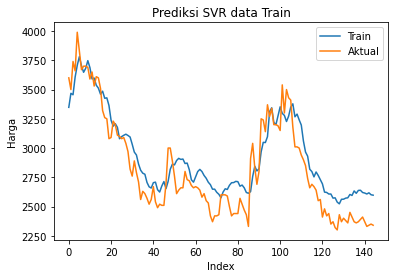

In [31]:
plt.plot(svrtrain_p.index,svrtrain_p.Train_Predict)
plt.plot(svrtrain_p.index,svrtrain_p.Data_Aktual)
plt.legend(['Train','Aktual'])
plt.xlabel('Index')
plt.ylabel('Harga')
plt.title('Prediksi SVR data Train')
plt.show()

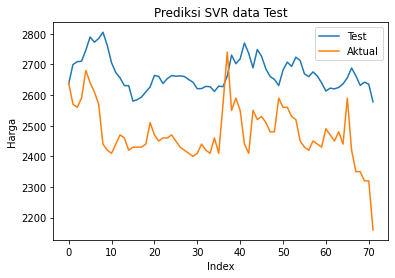

In [32]:
plt.plot(svrtest_p.index,svrtest_p.Test_Predict)
plt.plot(svrtest_p.index,svrtest_p.Data_Aktual)
plt.legend(['Test','Aktual'])
plt.xlabel('Index')
plt.ylabel('Harga')
plt.title('Prediksi SVR data Test')
plt.show()

##Metrik evaluasi RMSE, MSE dan MAE
Root Mean Square Error (RMSE), Mean Square Error (MSE) dan Mean absolute Error (MAE) adalah cara standar untuk mengukur kesalahan model dalam memprediksi data kuantitatif.

In [33]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  182.07228192385224
Train data MSE:  33150.31584495873
Test data MAE:  159.15963392462797
-------------------------------------------------------------------------------------
Test data RMSE:  209.430531930674
Test data MSE:  43861.147704765055
Test data MAE:  195.2596197274796


##Dijelaskan skor regresi varians
Skor varians yang dijelaskan menjelaskan penyebaran kesalahan dari kumpulan data yang diberikan, dan rumusnya ditulis sebagai berikut: Di sini, dan Var(y) masing-masing adalah varians dari kesalahan prediksi dan nilai aktual. Skor mendekati 1,0 sangat diinginkan, menunjukkan kuadrat deviasi standar kesalahan yang lebih baik.

In [34]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.8741358862731968
Test data explained variance regression score: 0.16261061700214396


##Skor R2 untuk regresi
R-kuadrat (R2) adalah ukuran statistik yang mewakili proporsi varians untuk variabel dependen yang dijelaskan oleh variabel independen atau variabel dalam model regresi.

1 = Terbaik

0 atau < 0 = lebih buruk

In [35]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.8152154641756896
Test data R2 score: -4.552708381499341


Regression Loss Mean Gamma deviance regression loss (MGD) dan Mean Poisson deviance regression loss (MPD)

In [36]:
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

Train data MGD:  0.0043318075334875875
Test data MGD:  0.006549093001762578
----------------------------------------------------------------------
Train data MPD:  11.915900948580541
Test data MPD:  16.938640079935


Perbandingan antara harga penutupan saham asli vs harga penutupan yang diprediksi

Predicting next 10 days

In [37]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 10
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        
        yhat = svr_rbf.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        yhat = svr_rbf.predict(x_input)
        
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        
        i=i+1
        
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  10


Plotting last 15 days and next predicted 10 days

In [38]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25]


In [39]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 10 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 10 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()


Merencanakan seluruh harga saham penutupan dengan prediksi

In [40]:
svrdf=closedf.tolist()
svrdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
svrdf=scaler.inverse_transform(svrdf).reshape(1,-1).tolist()[0]

names = cycle(['Close Price'])

fig = px.line(svrdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

#Random Forest Regressor - RF

In [41]:
rfr = RandomForestRegressor(n_estimators = 100, random_state = 0)
rfr.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [42]:
# Lets Do the prediction 

train_predict=rfr.predict(X_train)
test_predict=rfr.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (145, 1)
Test data prediction: (72, 1)


In [43]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [44]:
rfrtrain_p = pd.DataFrame(train_predict, columns=["Train_Predict"])
rfrtrain_p['Data_Aktual'] = original_ytrain
print(rfrtrain_p.head())

print('\n')
rfrtest_p = pd.DataFrame(test_predict, columns=["Test_Predict"])
rfrtest_p['Data_Aktual'] = original_ytest
print(rfrtest_p.head())

   Train_Predict  Data_Aktual
0         3471.2       3600.0
1         3492.6       3500.0
2         3644.8       3740.0
3         3620.1       3660.0
4         3850.4       3990.0


   Test_Predict  Data_Aktual
0        2428.5       2640.0
1        2647.3       2570.0
2        2546.4       2560.0
3        2521.8       2590.0
4        2541.8       2680.0


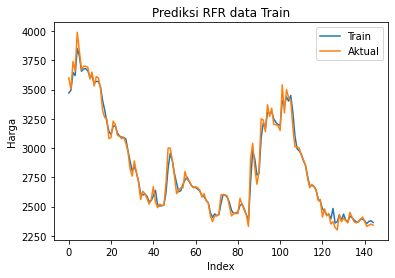

In [45]:
plt.plot(rfrtrain_p.index,rfrtrain_p.Train_Predict)
plt.plot(rfrtrain_p.index,rfrtrain_p.Data_Aktual)
plt.legend(['Train','Aktual'])
plt.xlabel('Index')
plt.ylabel('Harga')
plt.title('Prediksi RFR data Train')
plt.show()

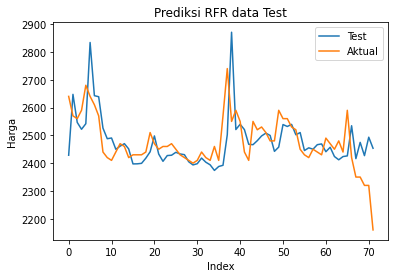

In [46]:
plt.plot(rfrtest_p.index,rfrtest_p.Test_Predict)
plt.plot(rfrtest_p.index,rfrtest_p.Data_Aktual)
plt.legend(['Test','Aktual'])
plt.xlabel('Index')
plt.ylabel('Harga')
plt.title('Prediksi RFR data Test')
plt.show()

##Metrik evaluasi RMSE, MSE dan MAE
Root Mean Square Error (RMSE), Mean Square Error (MSE) dan Mean absolute Error (MAE) adalah cara standar untuk mengukur kesalahan model dalam memprediksi data kuantitatif.

In [47]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  50.06838633653825
Train data MSE:  2506.84331034485
Test data MAE:  33.686896551724324
-------------------------------------------------------------------------------------
Test data RMSE:  91.38146617947815
Test data MSE:  8350.57236111111
Test data MAE:  61.62638888888882


##Menjelaskan skor regresi varians
Skor varians yang dijelaskan menjelaskan penyebaran kesalahan dari kumpulan data yang diberikan, dan rumusnya ditulis sebagai berikut: Di sini, dan Var(y) masing-masing adalah varians dari kesalahan prediksi dan nilai aktual. Skor mendekati 1,0 sangat diinginkan, menunjukkan kuadrat deviasi standar kesalahan yang lebih baik.

In [48]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9860281480839694
Test data explained variance regression score: -0.05710351903723443


##Skor R2 untuk regresi
R-kuadrat (R2) adalah ukuran statistik yang mewakili proporsi varians untuk variabel dependen yang dijelaskan oleh variabel independen atau variabel dalam model regresi.

1 = Terbaik

0 atau < 0 = lebih buruk

In [49]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9860265018392941
Test data R2 score: -0.057160962863289866


Regression Loss Mean Gamma deviance regression loss (MGD) dan Mean Poisson deviance regression loss (MPD)

In [50]:
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

Train data MGD:  0.000290714809023988
Test data MGD:  0.001309773419068072
----------------------------------------------------------------------
Train data MPD:  0.8458996589157511
Test data MPD:  3.3015712095504646


Comparision between original stock close price vs predicted close price

In [51]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': close_stock['date'],
                       'original_close': close_stock['close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()


Train predicted data:  (249, 1)
Test predicted data:  (249, 1)


Predicting next 10 days

In [53]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 10
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        
        yhat = rfr.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        yhat = rfr.predict(x_input)
        
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        
        i=i+1
        
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  10


Plotting last 15 days and next predicted 10 days

In [54]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25]


In [55]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

names = cycle(['Last 15 days close price','Predicted next 10 days close price'])

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 10 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Merencanakan seluruh harga saham penutupan dengan prediksi

In [56]:
rfdf=closedf.tolist()
rfdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
rfdf=scaler.inverse_transform(rfdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(rfdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

#Decision Tree Regressor-DT

In [57]:
dt = DecisionTreeRegressor(random_state=0 ,max_leaf_nodes=100)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=100, random_state=0)

In [58]:
# Lets Do the prediction 

train_predict=dt.predict(X_train)
test_predict=dt.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (145, 1)
Test data prediction: (72, 1)


In [59]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [60]:
dttrain_p = pd.DataFrame(train_predict, columns=["Train_Predict"])
dttrain_p['Data_Aktual'] = original_ytrain
print(dttrain_p.head())

print('\n')
dttest_p = pd.DataFrame(test_predict, columns=["Test_Predict"])
dttest_p['Data_Aktual'] = original_ytest
print(dttest_p.head())

   Train_Predict  Data_Aktual
0         3600.0       3600.0
1         3505.0       3500.0
2         3740.0       3740.0
3         3660.0       3660.0
4         3990.0       3990.0


   Test_Predict  Data_Aktual
0   2360.000000       2640.0
1   2596.666667       2570.0
2   2495.000000       2560.0
3   2495.000000       2590.0
4   2470.000000       2680.0


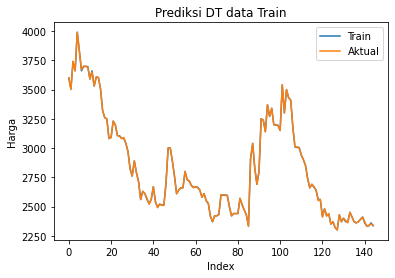

In [61]:
plt.plot(dttrain_p.index,dttrain_p.Train_Predict)
plt.plot(dttrain_p.index,dttrain_p.Data_Aktual)
plt.legend(['Train','Aktual'])
plt.xlabel('Index')
plt.ylabel('Harga')
plt.title('Prediksi DT data Train')
plt.show()

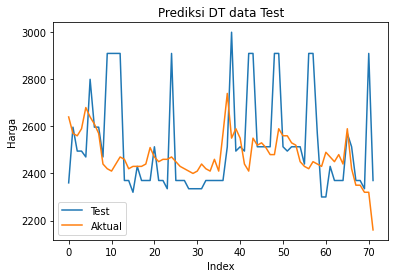

In [62]:
plt.plot(dttest_p.index,dttest_p.Test_Predict)
plt.plot(dttest_p.index,dttest_p.Data_Aktual)
plt.legend(['Test','Aktual'])
plt.xlabel('Index')
plt.ylabel('Harga')
plt.title('Prediksi DT data Test')
plt.show()

##Metrik evaluasi RMSE, MSE dan MAE
Root Mean Square Error (RMSE), Mean Square Error (MSE) dan Mean absolute Error (MAE) adalah cara standar untuk mengukur kesalahan model dalam memprediksi data kuantitatif.

In [63]:
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  3.539595405153537
Train data MSE:  12.528735632184032
Test data MAE:  1.9540229885057607
-------------------------------------------------------------------------------------
Test data RMSE:  215.15632774884955
Test data MSE:  46292.245370370365
Test data MAE:  145.06944444444446


##Menjelaskan skor regresi varians
Skor varians yang dijelaskan menjelaskan penyebaran kesalahan dari kumpulan data yang diberikan, dan rumusnya ditulis sebagai berikut: Di sini, dan Var(y) masing-masing adalah varians dari kesalahan prediksi dan nilai aktual. Skor mendekati 1,0 sangat diinginkan, menunjukkan kuadrat deviasi standar kesalahan yang lebih baik.

In [64]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.999930163060615
Test data explained variance regression score: -4.59211342484621


##Skor R2 untuk regresi
R-kuadrat (R2) adalah ukuran statistik yang mewakili proporsi varians untuk variabel dependen yang dijelaskan oleh variabel independen atau variabel dalam model regresi.

1 = Terbaik

0 atau < 0 = lebih buruk

In [65]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.999930163060615
Test data R2 score: -4.8604790872481916


Regression Loss Mean Gamma deviance regression loss (MGD) and Mean Poisson deviance regression loss (MPD)

In [66]:
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

Train data MGD:  1.7322941189823087e-06
Test data MGD:  0.006393299245890537
----------------------------------------------------------------------
Train data MPD:  0.00460571224953912
Test data MPD:  17.168852096977542


Perbandingan antara harga penutupan saham asli vs harga penutupan yang diprediksi

In [67]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': close_stock['date'],
                       'original_close': close_stock['close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (249, 1)
Test predicted data:  (249, 1)


Predicting next 10 days

In [69]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 10
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        
        yhat = dt.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        yhat = dt.predict(x_input)
        
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        
        i=i+1
        
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  10


Plotting last 15 days and next predicted 10 days

In [70]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25]


In [71]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

names = cycle(['Last 15 days close price','Predicted next 10 days close price'])

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 10 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Merencanakan seluruh harga saham penutupan dengan prediksi

In [72]:
rfdf=closedf.tolist()
rfdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
rfdf=scaler.inverse_transform(rfdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(rfdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [73]:
finaldf = pd.DataFrame({
    'svr':svrdf,
    'rf':rfdf,
})
finaldf.head()

,svr,rf
0,4910.0,4910.0
1,4810.0,4810.0
2,4800.0,4800.0
3,4470.0,4470.0
4,4160.0,4160.0


#Conclusion Chart

In [74]:
names = cycle(['SVR', 'RF'])

fig = px.line(finaldf[225:], x=finaldf.index[225:], y=[finaldf['svr'][225:],finaldf['rf'][225:],
             labels={'x': 'Timestamp','value':'Stock close price'})
fig.update_layout(title_text='Final stock analysis chart', font_size=15, font_color='black',legend_title_text='Algorithms')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

SyntaxError: ignored